In [1]:
import d2l 
from mxnet import *

npx.set_np()

In [2]:
batch_size = 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### INITIAL PARAMETERS

In [3]:
num_inputs,num_outputs, num_hiddens = 784, 10, 256

w1 = np.random.normal(scale = 0.01, size = (num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)

w2 = np.random.normal(scale = 0.01, size= (num_hiddens, num_outputs))
b2 = np.zeros(num_outputs)

params = [w1, b1, w2, b2]

In [5]:
for param in params:
    param.attach_grad()

### ACTIVATION FUNCTION

In [6]:
def relu(x):
    return np.maximum(x, 0)

### THE MODEL

In [12]:
def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(np.dot(X, w1) + b1)
    return np.dot(H, w2) + b2

### LOSS FUNCTION

In [13]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

### TRAINING

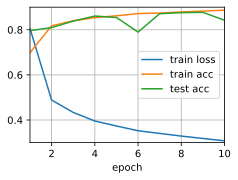

In [14]:
num_epochs, lr = 10, 0.5

d2l.train_ch3( net, train_iter, test_iter, loss, num_epochs, 
             lambda batch_size: d2l.sgd(params, lr, batch_size))

### PREDICT

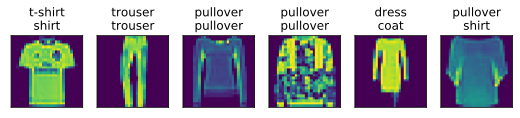

In [15]:
d2l.predict_ch3(net, test_iter)